<a href="https://colab.research.google.com/github/mpilomthiyane97/ai-engineering/blob/main/Explore_Word_Embeddings_%26_Relationships_with_Gensim_(Word2Vec).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ⚠️ Step 1: Restart runtime (Runtime > Restart Runtime) BEFORE running this cell!

# Step 2: Upgrade numpy to a version compatible with Colab & other libraries
!pip install --upgrade numpy==1.26.4 --quiet
import os
os.kill(os.getpid(), 9)  # 🔁 Force restart the kernel to reload numpy cleanly


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
cvxpy 1.6.5 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.


Vector for 'king':
 [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]

Shape of 'king' vector: (50,)

Similarity between 'king' and 'queen': 0.7839

Result of 'king' - 'man' + 'woman': [('queen', 0.8523604273796082)]


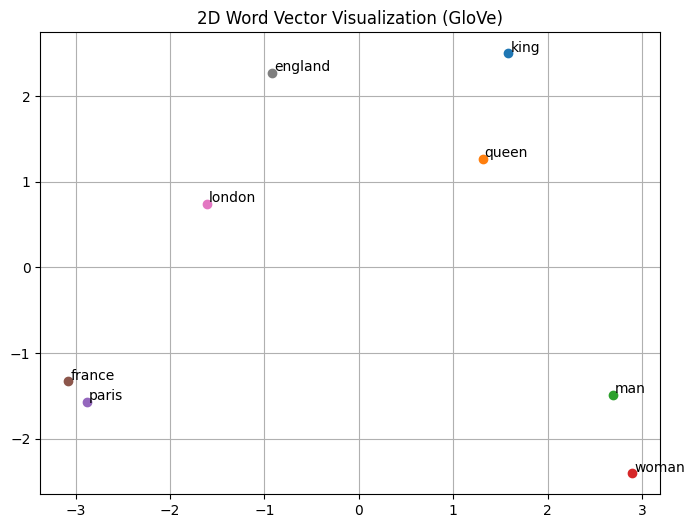

In [2]:
# Load necessary libraries
import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Load a small pre-trained Word2Vec model
model = api.load("glove-wiki-gigaword-50")  # 50-dimension GloVe embeddings

# 2️⃣ Inspect and print the vector for a specific word
word = 'king'
print(f"Vector for '{word}':\n", model[word])
print(f"\nShape of '{word}' vector:", model[word].shape)

# 3️⃣ Compute similarity between words
similarity = model.similarity('king', 'queen')
print(f"\nSimilarity between 'king' and 'queen': {similarity:.4f}")

# 4️⃣ Try vector arithmetic: king - man + woman ≈ queen
result = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print(f"\nResult of 'king' - 'man' + 'woman': {result}")

# 5️⃣ Select a few words to visualize
words = ['king', 'queen', 'man', 'woman', 'paris', 'france', 'london', 'england']
vectors = np.array([model[word] for word in words])

# 6️⃣ Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# 7️⃣ Plot the word vectors
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.annotate(word, (reduced[i, 0] + 0.02, reduced[i, 1] + 0.02))
plt.title("2D Word Vector Visualization (GloVe)")
plt.grid(True)
plt.show()
